In [2]:
import pandas as pd

# Load the uploaded dataset
df = pd.read_csv("Churn_Modelling.csv")

# Display the first 5 rows of the dataset
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
import pandas as pd

# Load your original file
df = pd.read_csv("Churn_Modelling.csv")

# Drop unnecessary columns
df_cleaned = df.drop(columns=['RowNumber', 'Surname'])

# Encode categorical columns
df_cleaned = pd.get_dummies(df_cleaned, columns=['Geography'], drop_first=True)
df_cleaned['Gender'] = df_cleaned['Gender'].map({'Female': 0, 'Male': 1})

# Save the cleaned dataset
df_cleaned.to_csv("Cleaned_Churn_Modelling.csv", index=False)

# Display cleaned dataset and confirm no missing values
df_cleaned.head(), missing_values


(   CustomerId  CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  \
 0    15634602          619       0   42       2       0.00              1   
 1    15647311          608       0   41       1   83807.86              1   
 2    15619304          502       0   42       8  159660.80              3   
 3    15701354          699       0   39       1       0.00              2   
 4    15737888          850       0   43       2  125510.82              1   
 
    HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
 0          1               1        101348.88       1              False   
 1          0               1        112542.58       0              False   
 2          1               0        113931.57       1              False   
 3          0               0         93826.63       0              False   
 4          1               1         79084.10       0              False   
 
    Geography_Spain  
 0            False  
 1             True  


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Features and target (CustomerId included but not used in training)
X = df_cleaned.drop(columns=["Exited"])
y = df_cleaned["Exited"]

# Exclude CustomerId from training features
X_model = X.drop(columns=["CustomerId"])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_model, y, test_size=0.2, random_state=42)

# Train a basic classification model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8660
Precision: 0.7660
Recall: 0.4580
F1-score: 0.5732


/tmp/ipython-input-16-1535955425.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="viridis")


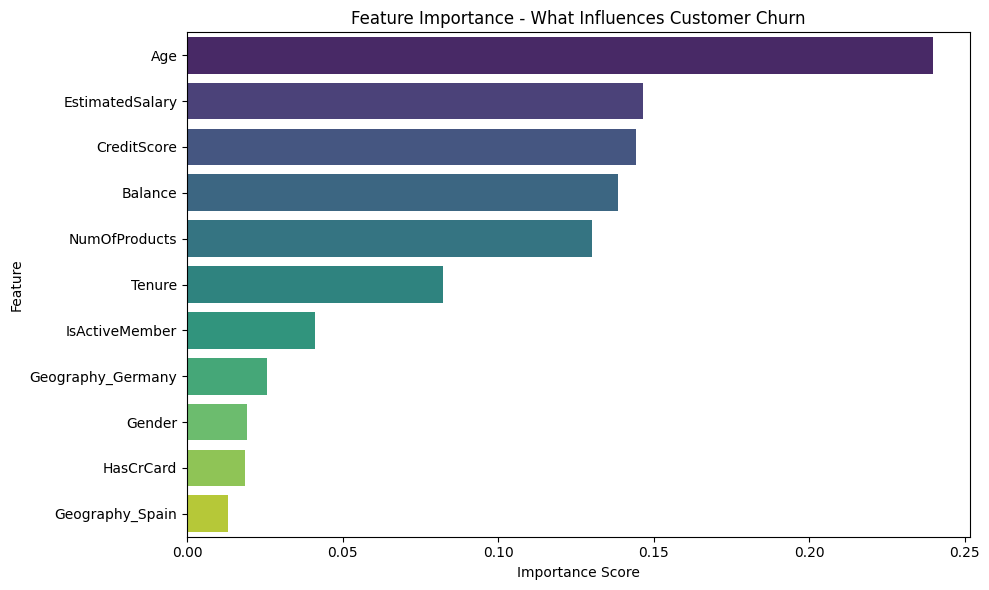

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the model
importances = model.feature_importances_
feature_names = X_model.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance - What Influences Customer Churn")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
